<a href="https://colab.research.google.com/github/AbeerProg/RRDS/blob/main/RFmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [119]:

import pandas as pd
from collections import Counter
from textblob import TextBlob
import re

df = pd.read_excel('datasetwithf_formodel.xlsx')


In [120]:
print(df.head)

<bound method NDFrame.head of               P        FP  WC        RW       S         G        PV   RN  LG  \
0      0.051873  0.069767  59  0.058824  0.9118  0.655172  0.000000   21   0   
1      0.035088  0.000000  18  0.181818  0.7003  0.444444  0.000000   64   0   
2      0.042857  0.000000  12  0.000000  0.8316  0.500000  0.000000   71   0   
3      0.084507  0.000000  12  0.000000  0.8807  0.500000  0.000000  138   0   
4      0.048077  0.200000  19  0.000000  0.7845  1.052632  0.333333    2   1   
...         ...       ...  ..       ...     ...       ...       ...  ...  ..   
21603  0.023529  0.125000  45  0.210526 -0.9538  0.477273  0.000000   20   1   
21604  0.024609  0.048780  82  0.108108 -0.5106  0.509259  0.100000  120   0   
21605  0.000000  0.000000  12  0.000000  0.0000  0.333333  0.000000  136   0   
21606  0.010638  0.000000  16  0.000000 -0.5423  1.062500  0.000000  251   0   
21607  0.022901  0.153846  22  0.000000  0.8779  0.545455  0.000000    8   1   

       L 

In [126]:
from sklearn.model_selection import train_test_split

X = df[['P', 'FP', 'WC', 'RW','S','G','PV','RN','LG','L','M']]  # features
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Accuracy: 0.9747801943544655
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      2545
           1       0.98      0.95      0.97      1777

    accuracy                           0.97      4322
   macro avg       0.98      0.97      0.97      4322
weighted avg       0.97      0.97      0.97      4322



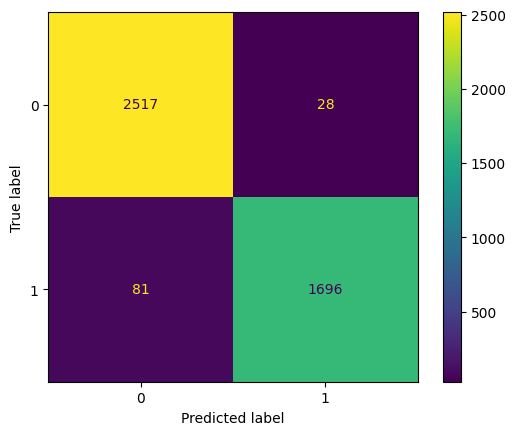

In [122]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Model Trainning
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Model Test
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
import matplotlib.pyplot as plt
plt.show()
